Autor: Marek Sigmund

Rozkład temperatury w jednowymiarowym pręcie niejednorodnym

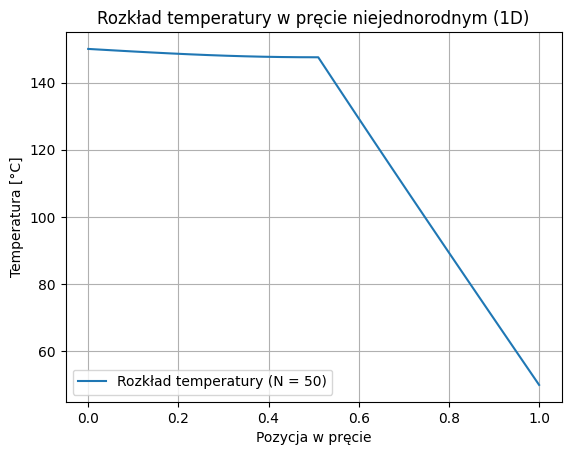

Liczba iteracji: 2122
Czas wykonania: 0.4088 s


(array([150.        , 149.84213656, 149.6855516 , 149.52896706,
        149.37619697, 149.22342773, 149.07694626, 148.93046605,
        148.7926437 , 148.65482301, 148.52788811, 148.40095523,
        148.28695733, 148.17296179, 148.07373804, 147.97451694,
        147.8916619 , 147.80880976, 147.74364924, 147.6784918 ,
        147.63206106, 147.58563356, 147.55866034, 147.53169045,
        147.524583  , 147.51038037, 143.36098791, 139.21159881,
        135.08194906, 130.9523026 , 126.84182527, 122.73135111,
        118.6391611 , 114.5469741 , 110.47188607, 106.39680082,
        102.33734862,  98.27789892,  94.23235966,  90.1868226 ,
         86.15324496,  82.11966917,  78.09590543,  74.07214317,
         70.05588448,  66.03962686,  62.02844113,  58.01725606,
         54.00862792,  50.        ]),
 2122,
 0.4087691307067871)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k, max_iter, tolerance=None):
    """
    Funkcja symuluje rozkład temperatury w jednowymiarowym pręcie niejednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - N: liczba węzłów siatki (int)
    - T0: temperatura na lewym końcu pręta (float)
    - TN: temperatura na prawym końcu pręta (float)
    - k: tablica z wartościami współczynnika przewodnictwa cieplnego (np.array)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: lista z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury na podstawie równania różnic skończonych
        for i in range(1, N - 1):
            k_left = (k[i] + k[i-1]) / 2
            k_right = (k[i] + k[i+1]) / 2
            temperatures[i] = (k_right * prev_temperatures[i+1] + k_left * prev_temperatures[i-1]) / (k_left + k_right)

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.plot(np.linspace(0, 1, N), temperatures, label=f'Rozkład temperatury (N = {N})')
    plt.xlabel("Pozycja w pręcie")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie niejednorodnym (1D)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji z tablicą k
N = 50
k = np.array([237.0] * (N // 2) + [0.12] * (N - N // 2))  # Aluminium + Drewno

simulate_heat_transfer_nonhomogeneous1D(
    N=N,
    T0=150,
    TN=50,
    k=k,
    max_iter=10000,
    tolerance=0.01
)


Rozkład temperatury w dwuwymiarowym pręcie niejednorodnym

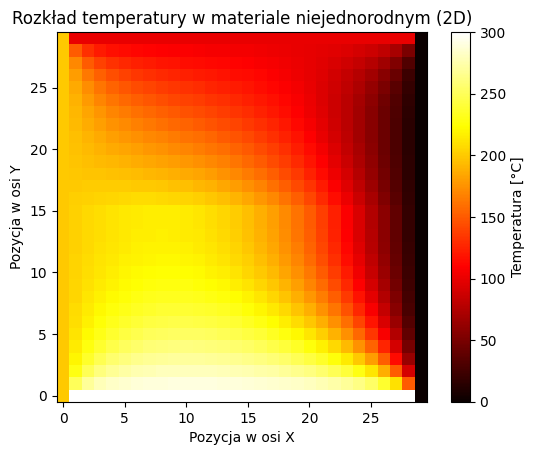

Liczba iteracji: 896
Czas wykonania: 5.4859 s


(array([[200.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        , 300.        , 300.        , 300.        ,
         300.        ,   0.        ],
        [200.        , 249.71961155, 269.19896092, 278.19774184,
         282.97325329, 285.77362144, 287.51777009, 288.6285325 ,
         289.32036003, 289.7102377 , 289.86469422, 289.82187454,
         289.60220328, 289.21411631, 288.65655442, 287.92012696,
         286.986524  , 285.82704287, 284.39900563, 282.6400555 ,
         280.45772515, 277.7115068 , 274.17901415, 269.48962873,
         262.98221396, 253.37243775, 237.88876782, 209.77321551,
         150.24082657,   0.        ],
        [200. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k, max_iter, tolerance=None):
    """
    Funkcja symuluje rozkład temperatury w dwuwymiarowym materiale niejednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - Nx: liczba węzłów siatki w osi X (int)
    - Ny: liczba węzłów siatki w osi Y (int)
    - TU, TD: temperatury na górze i dole domeny (float)
    - TL, TR: temperatury na lewym i prawym boku domeny (float)
    - k: tablica współczynnika przewodnictwa cieplnego (np.array)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: tablica 2D z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros((Nx, Ny))
    temperatures[0, :] = TU   # Góra
    temperatures[-1, :] = TD  # Dół
    temperatures[:, 0] = TL   # Lewa strona
    temperatures[:, -1] = TR  # Prawa strona

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury w całym obszarze
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                kx_left = (k[i, j] + k[i-1, j]) / 2
                kx_right = (k[i, j] + k[i+1, j]) / 2
                ky_up = (k[i, j] + k[i, j+1]) / 2
                ky_down = (k[i, j] + k[i, j-1]) / 2

                temperatures[i, j] = (
                    kx_right * prev_temperatures[i+1, j] +
                    kx_left * prev_temperatures[i-1, j] +
                    ky_up * prev_temperatures[i, j+1] +
                    ky_down * prev_temperatures[i, j-1]
                ) / (kx_right + kx_left + ky_up + ky_down)

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.imshow(temperatures, cmap='hot', origin='lower')
    plt.colorbar(label="Temperatura [°C]")
    plt.title("Rozkład temperatury w materiale niejednorodnym (2D)")
    plt.xlabel("Pozycja w osi X")
    plt.ylabel("Pozycja w osi Y")
    plt.grid(False)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji z tablicą k
Nx, Ny = 30, 30
k = np.full((Nx, Ny), 237.0)  # Aluminium jako baza
k[Nx//2:, :] = 0.12           # Połowa z drewna

simulate_heat_transfer_nonhomogeneous2D(
    Nx=Nx,
    Ny=Ny,
    TU=300,
    TD=100,
    TL=200,
    TR=0,
    k=k,
    max_iter=10000,
    tolerance=0.01
)


Rozkład temperatury w dwuwymiarowym pręcie

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_homogeneous2D(Nx, Ny, TU, TD, TL, TR, k, max_iter=10000, tolerance=1e-3):
    """
    Funkcja symuluje rozkład temperatury w dwuwymiarowym, jednorodnym materiale
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - Nx: liczba węzłów siatki w osi X (int)
    - Ny: liczba węzłów siatki w osi Y (int)
    - TU, TD: temperatury na górze i dole domeny (float)
    - TL, TR: temperatury na lewym i prawym boku domeny (float)
    - k: stała wartość współczynnika przewodnictwa cieplnego (float)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: tablica 2D z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU   # Górny brzeg
    temperatures[-1, :] = TD  # Dolny brzeg
    temperatures[:, 0] = TL   # Lewy brzeg
    temperatures[:, -1] = TR  # Prawy brzeg

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury w całym obszarze
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                temperatures[j, i] = (prev_temperatures[j+1, i] + prev_temperatures[j-1, i] +
                                      prev_temperatures[j, i+1] + prev_temperatures[j, i-1]) / 4.0

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja - Mapa ciepła
    plt.figure(figsize=(8, 6))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Temperatura [°C]')
    plt.title('Mapa ciepła rozkładu temperatury (2D - Jednorodny)')
    plt.xlabel('Pozycja w osi X')
    plt.ylabel('Pozycja w osi Y')
    plt.show()

    # Wizualizacja - Kontury
    plt.figure(figsize=(8, 6))
    plt.contourf(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny), temperatures, 20, cmap='hot')
    plt.colorbar(label='Temperatura [°C]')
    plt.title('Konturowy rozkład temperatury (2D - Jednorodny)')
    plt.xlabel('Pozycja w osi X')
    plt.ylabel('Pozycja w osi Y')
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji dla materiału jednorodnego
# simulate_heat_transfer_homogeneous2D(
#     Nx=50, Ny=50,
#     TU=0, TD=100,
#     TL=75, TR=50,
#     k=200,  # Wartość przykładowa dla materiału jednorodnego
#     max_iter=10000,
#     tolerance=1e-3
#)


Rozkład temperatury w jednowymiarowym pręcie

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_homogeneous1D(N, T0, TN, k, max_iter=10000, tolerance=1e-3):
    """
    Funkcja symuluje rozkład temperatury w jednowymiarowym pręcie jednorodnym
    przy użyciu metody różnic skończonych (MRS).

    Parametry:
    - N: liczba węzłów siatki (int)
    - T0: temperatura na lewym końcu pręta (float)
    - TN: temperatura na prawym końcu pręta (float)
    - k: stała wartość współczynnika przewodnictwa cieplnego (float)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float, opcjonalna)

    Zwraca:
    - temperatures: lista z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    # Inicjalizacja tablicy temperatur
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    # Rozpoczęcie pomiaru czasu
    start_time = time.time()

    # Iteracyjna symulacja
    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Aktualizacja temperatury na podstawie równania różnic skończonych
        for i in range(1, N - 1):
            temperatures[i] = (prev_temperatures[i+1] + prev_temperatures[i-1]) / 2.0

        # Sprawdzanie zbieżności
        if tolerance and np.max(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    # Pomiar końcowego czasu
    exec_time = time.time() - start_time

    # Wizualizacja wyników
    plt.plot(np.linspace(0, 1, N), temperatures, label=f'Rozkład temperatury (N = {N})')
    plt.xlabel("Pozycja w pręcie")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie jednorodnym (1D)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Wyniki końcowe
    print(f"Liczba iteracji: {iter_count}")
    print(f"Czas wykonania: {exec_time:.4f} s")

    return temperatures, iter_count, exec_time

# Przykładowe wywołanie funkcji dla materiału jednorodnego
# simulate_heat_transfer_homogeneous1D(
#     N=100,
#     T0=100,
#     TN=0,
#     k=200,  # Stała wartość k dla materiału jednorodnego
#     max_iter=10000,
#     tolerance=1e-3
# )


Zadanie 1

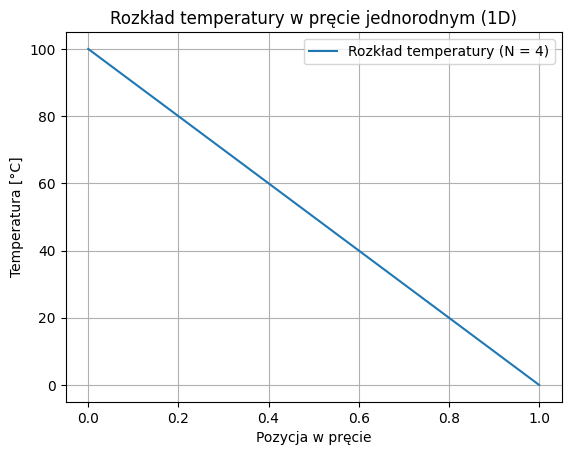

Liczba iteracji: 17
Czas wykonania: 0.0000 s


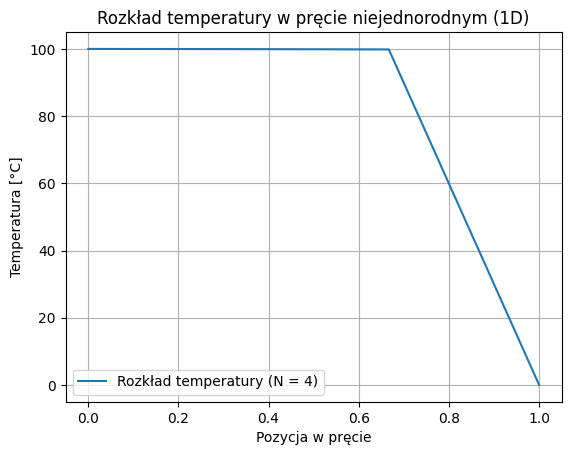

Liczba iteracji: 10000
Czas wykonania: 0.0767 s


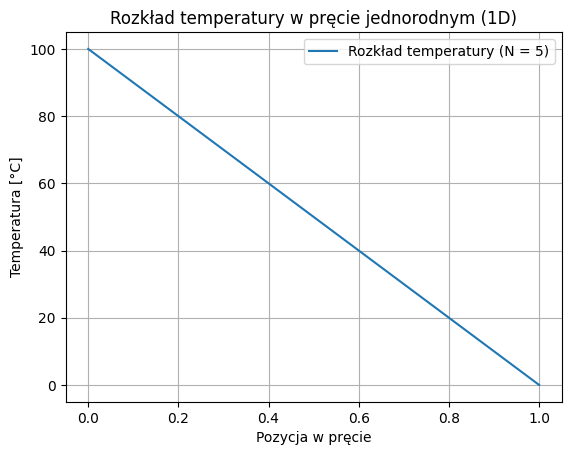

Liczba iteracji: 31
Czas wykonania: 0.0010 s


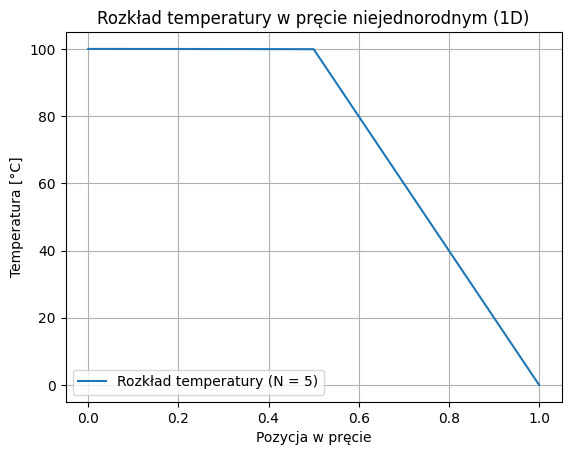

Liczba iteracji: 10000
Czas wykonania: 0.1081 s


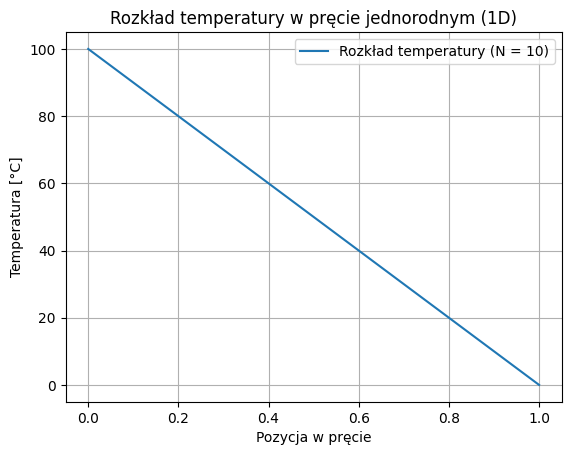

Liczba iteracji: 145
Czas wykonania: 0.0030 s


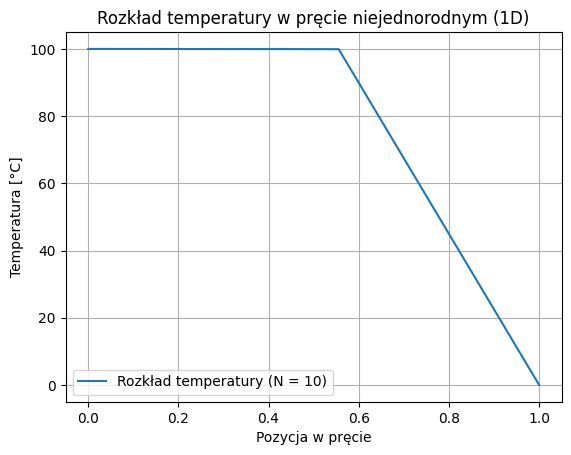

Liczba iteracji: 10000
Czas wykonania: 0.2639 s


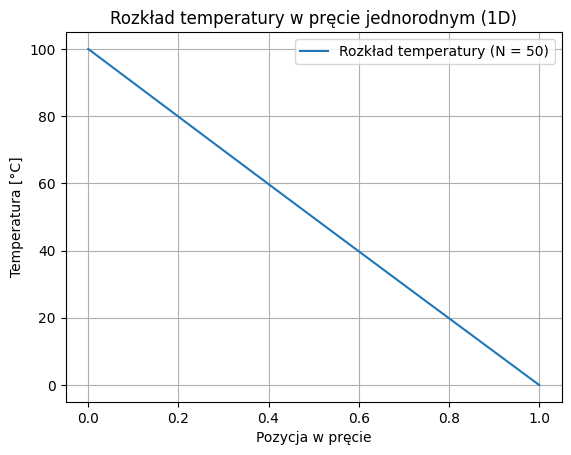

Liczba iteracji: 2708
Czas wykonania: 0.1667 s


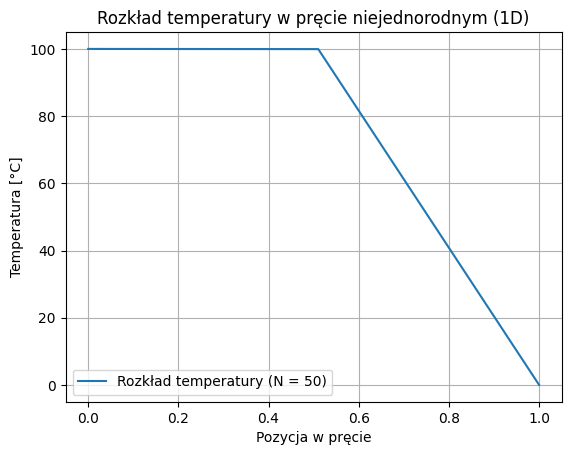

Liczba iteracji: 10000
Czas wykonania: 1.4486 s


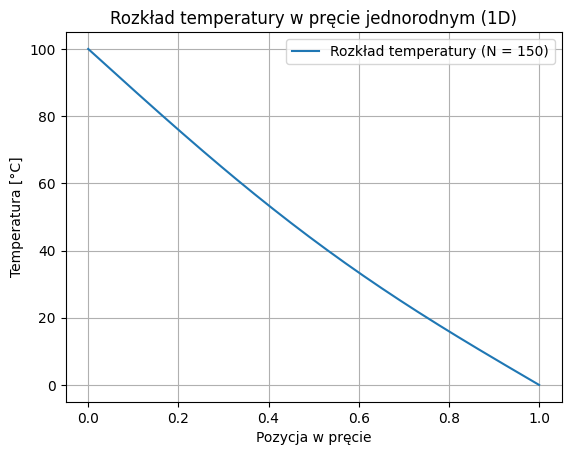

Liczba iteracji: 10000
Czas wykonania: 1.7080 s


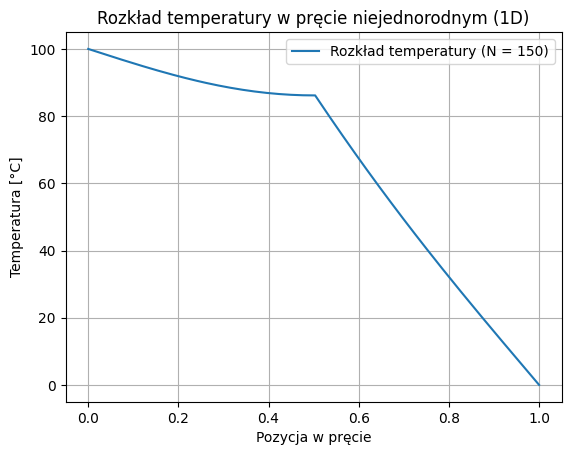

Liczba iteracji: 10000
Czas wykonania: 4.5602 s


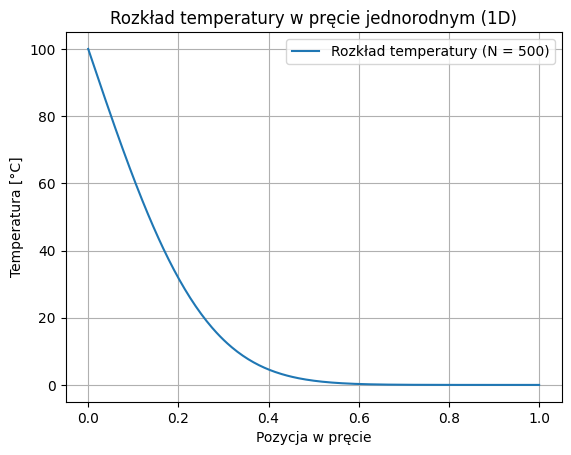

Liczba iteracji: 10000
Czas wykonania: 5.7431 s


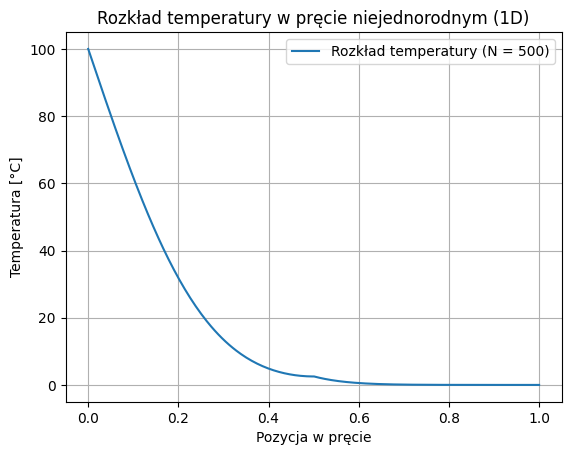

Liczba iteracji: 10000
Czas wykonania: 15.7224 s


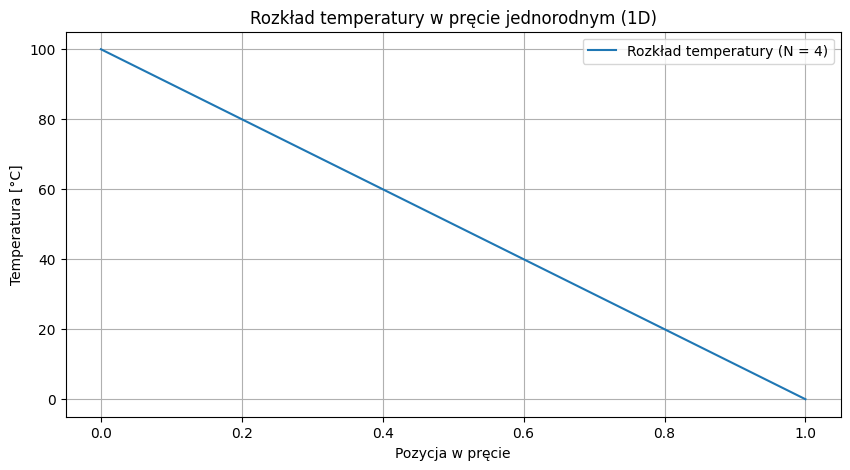

Liczba iteracji: 17
Czas wykonania: 0.0000 s


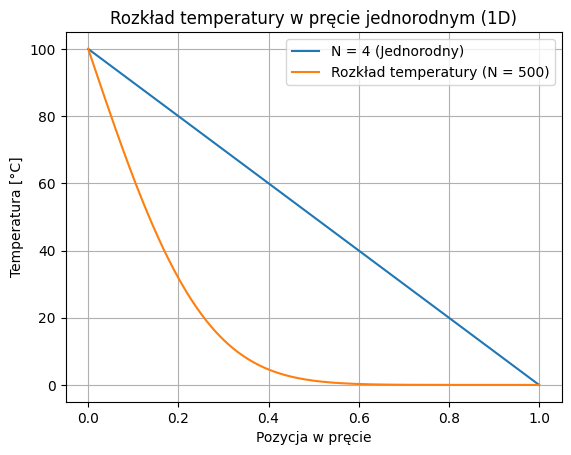

Liczba iteracji: 10000
Czas wykonania: 5.6957 s


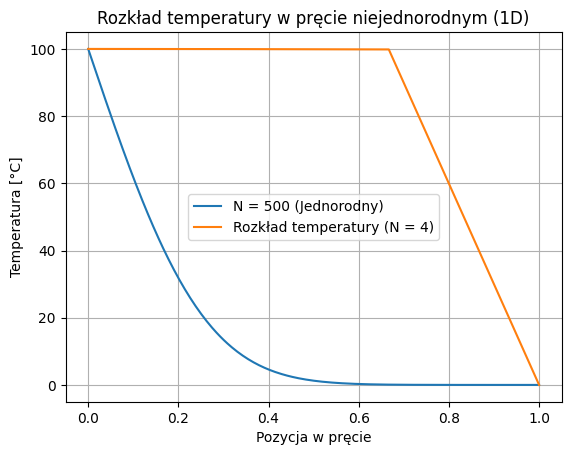

Liczba iteracji: 10000
Czas wykonania: 0.0817 s


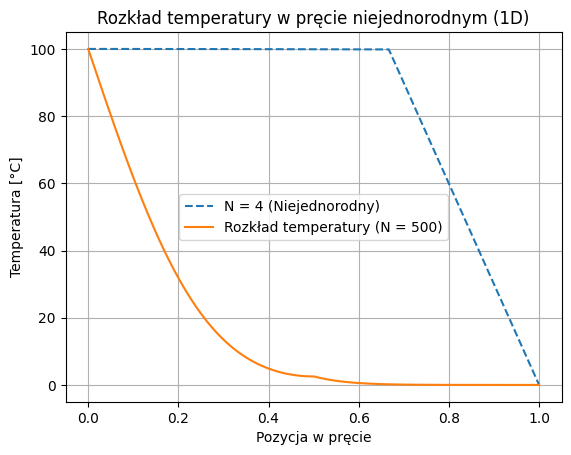

Liczba iteracji: 10000
Czas wykonania: 16.0345 s


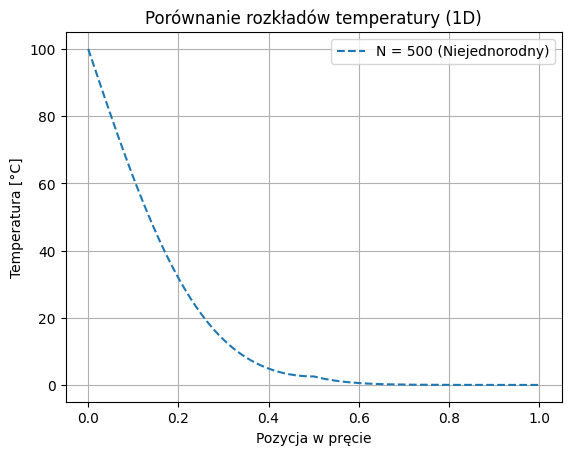

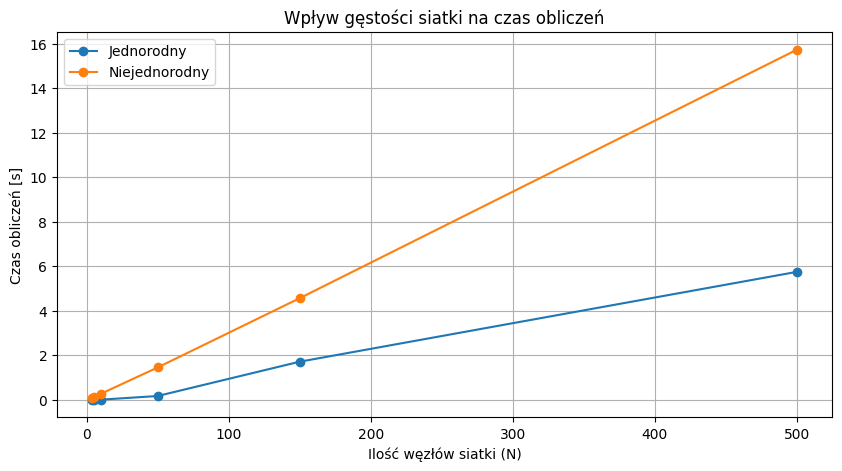


Tabela wyników:
Ilość węzłów siatki N    Czas obliczeń [s] (Jednorodny)     Czas obliczeń [s] (Niejednorodny)  
4                        0.000000                           0.076666                           
5                        0.001043                           0.108116                           
10                       0.003006                           0.263900                           
50                       0.166685                           1.448590                           
150                      1.708027                           4.560214                           
500                      5.743108                           15.722388                          


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Parametry testowe
nodes = [4, 5, 10, 50, 150, 500]
times_homogeneous = []
times_nonhomogeneous = []

# Symulacja i zbieranie danych
for N in nodes:
    k_homogeneous = np.full(N, 200.0)  # Stała wartość przewodnictwa
    k_nonhomogeneous = np.array([237.0] * (N // 2) + [0.12] * (N - N // 2))  # Aluminium + Drewno

    _, _, time_h = simulate_heat_transfer_homogeneous1D(N, T0=100, TN=0, k=k_homogeneous)
    _, _, time_nh = simulate_heat_transfer_nonhomogeneous1D(N, T0=100, TN=0, k=k_nonhomogeneous, max_iter=10000)

    times_homogeneous.append(time_h)
    times_nonhomogeneous.append(time_nh)

# Wykres zbiorczy - rozkład temperatury
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, 1, 4), simulate_heat_transfer_homogeneous1D(4, 100, 0, np.full(4, 200.0))[0], label='N = 4 (Jednorodny)')
plt.plot(np.linspace(0, 1, 500), simulate_heat_transfer_homogeneous1D(500, 100, 0, np.full(500, 200.0))[0], label='N = 500 (Jednorodny)')

plt.plot(np.linspace(0, 1, 4), simulate_heat_transfer_nonhomogeneous1D(4, 100, 0, np.array([237.0] * 2 + [0.12] * 2), max_iter=10000)[0], '--', label='N = 4 (Niejednorodny)')
plt.plot(np.linspace(0, 1, 500), simulate_heat_transfer_nonhomogeneous1D(500, 100, 0, np.array([237.0] * 250 + [0.12] * 250), max_iter=10000)[0], '--', label='N = 500 (Niejednorodny)')

plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Porównanie rozkładów temperatury (1D)')
plt.legend()
plt.grid(True)
plt.show()

# Wykres czasu obliczeń
plt.figure(figsize=(10, 5))
plt.plot(nodes, times_homogeneous, '-o', label='Jednorodny')
plt.plot(nodes, times_nonhomogeneous, '-o', label='Niejednorodny')

plt.xlabel('Ilość węzłów siatki (N)')
plt.ylabel('Czas obliczeń [s]')
plt.title('Wpływ gęstości siatki na czas obliczeń')
plt.legend()
plt.grid(True)
plt.show()

# Wydrukowanie tabeli w konsoli
print("\nTabela wyników:")
print(f"{'Ilość węzłów siatki N':<25}{'Czas obliczeń [s] (Jednorodny)':<35}{'Czas obliczeń [s] (Niejednorodny)':<35}")
print("="*95)

for i in range(len(nodes)):
    print(f"{nodes[i]:<25}{times_homogeneous[i]:<35.6f}{times_nonhomogeneous[i]:<35.6f}")


Wnioski:
W przeprowadzonym eksperymencie zauważono, że rozkład temperatury w materiale jednorodnym dla małej liczby węzłów (N = 4) jest liniowy, natomiast w materiale niejednorodnym nieliniowy, co wynika z różnicy we współczynnikach przewodnictwa cieplnego. Dla dużej liczby węzłów (N = 500) rozkład temperatury w obu przypadkach jest zbliżony, z wyraźną krzywizną w materiale niejednorodnym. Czas obliczeń rośnie wraz ze wzrostem liczby węzłów, a dla materiału niejednorodnego jest zauważalnie dłuższy z powodu dodatkowych obliczeń wynikających ze zmiennego współczynnika k. W przypadku dużej liczby węzłów czas obliczeń w materiale niejednorodnym był ponad 2,5 razy dłuższy niż w materiale jednorodnym. Dla prostych analiz mniejsza liczba węzłów może być wystarczająca, natomiast dla większej precyzji konieczne jest zwiększenie gęstości siatki.

Zadanie 2

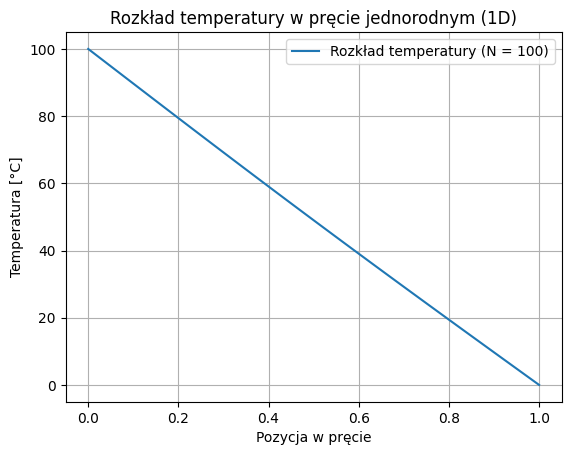

Liczba iteracji: 8263
Czas wykonania: 0.9476 s


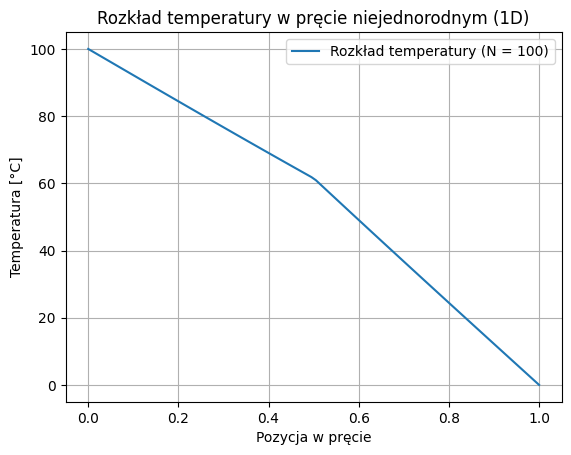

Liczba iteracji: 8706
Czas wykonania: 2.9686 s


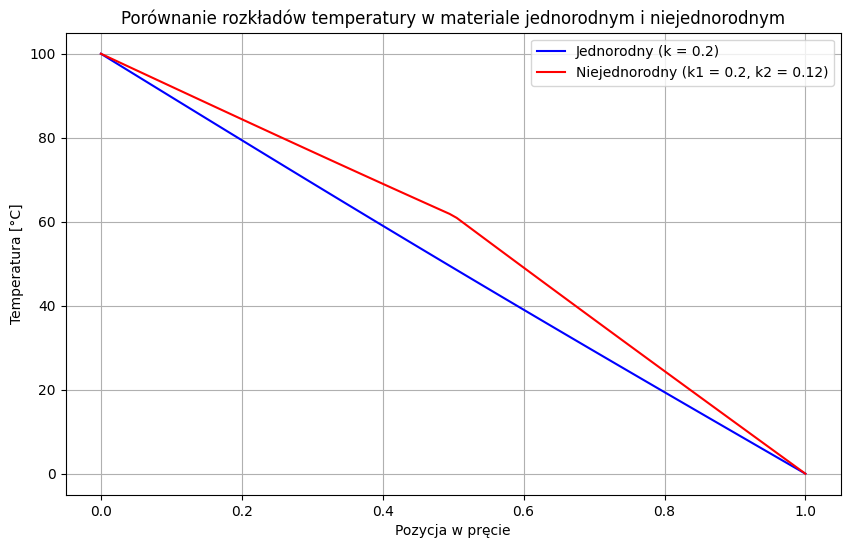

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 100
T0 = 100
TN = 0
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
k_nonhomogeneous = np.array([0.2] * (N // 2) + [0.12] * (N // 2))  # Materiał niejednorodny

# Maksymalna liczba iteracji i tolerancja
max_iter = 10000
tolerance = 0.001

# Obliczenia
temperature_homogeneous, _, _ = simulate_heat_transfer_homogeneous1D(N, T0, TN, k_homogeneous, max_iter, tolerance)
temperature_nonhomogeneous, _, _ = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_nonhomogeneous, max_iter, tolerance)

# Wykres porównawczy
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, N), temperature_homogeneous, label='Jednorodny (k = 0.2)', color='blue')
plt.plot(np.linspace(0, 1, N), temperature_nonhomogeneous, label='Niejednorodny (k1 = 0.2, k2 = 0.12)', color='red')
plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Porównanie rozkładów temperatury w materiale jednorodnym i niejednorodnym')
plt.legend()
plt.grid(True)
plt.show()


W materiale jednorodnym rozkład temperatury jest liniowy, co wynika z jednolitego współczynnika przewodnictwa cieplnego. W materiale niejednorodnym rozkład temperatury jest nieliniowy, a zmiana tempa spadku temperatury widoczna jest w miejscu przejścia z materiału o przewodnictwie k1 = 0.2 na materiał o przewodnictwie k2 = 0.12. Przewodnictwo cieplne w drugiej części pręta jest mniejsze, co powoduje wolniejszy spadek temperatury w tej części. Liczba iteracji oraz czas obliczeń w przypadku materiału niejednorodnego są większe ze względu na dodatkowe obliczenia związane z różnymi wartościami współczynnika k.

Zadanie 3

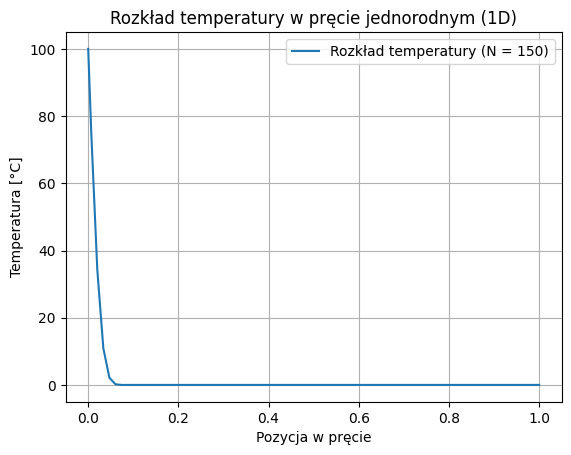

Liczba iteracji: 10
Czas wykonania: 0.0027 s


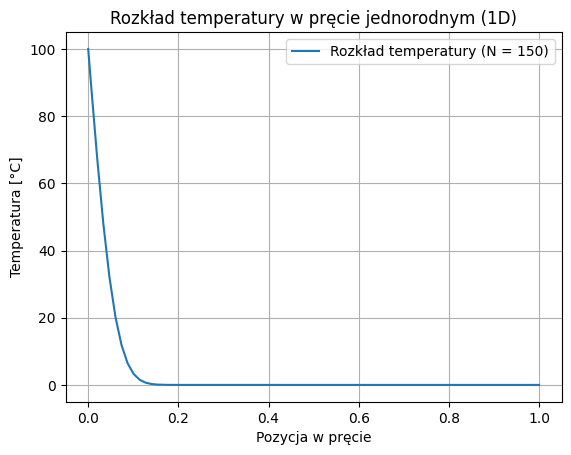

Liczba iteracji: 50
Czas wykonania: 0.0091 s


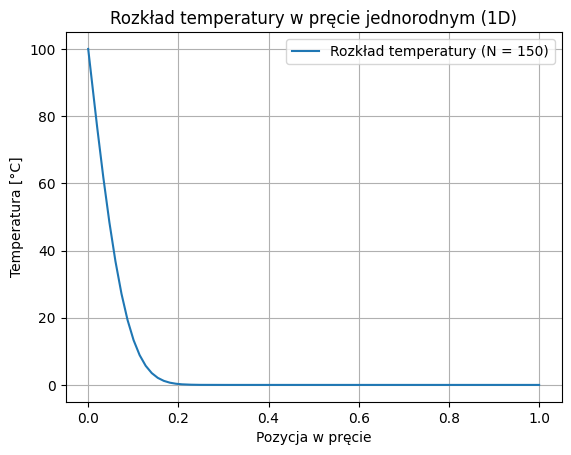

Liczba iteracji: 100
Czas wykonania: 0.0232 s


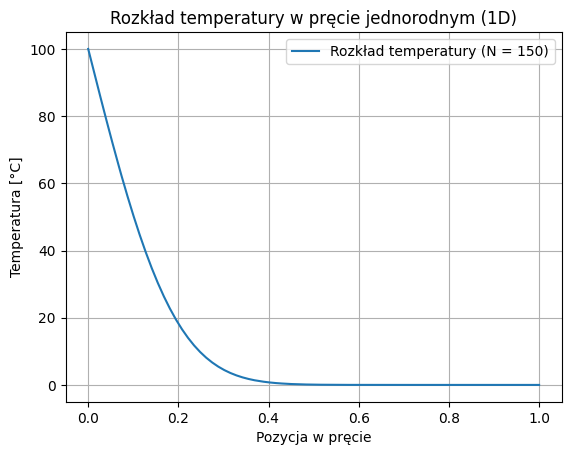

Liczba iteracji: 500
Czas wykonania: 0.0844 s


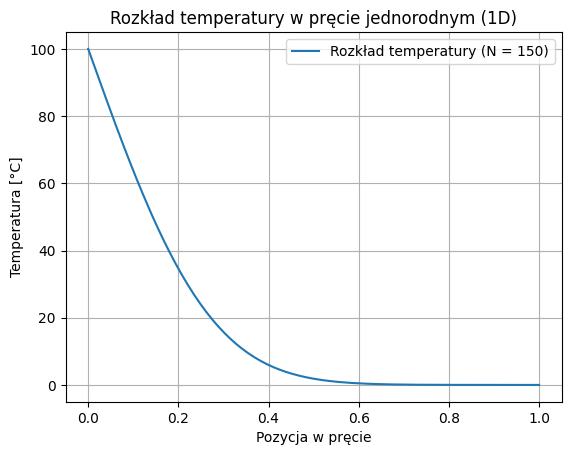

Liczba iteracji: 1000
Czas wykonania: 0.1750 s


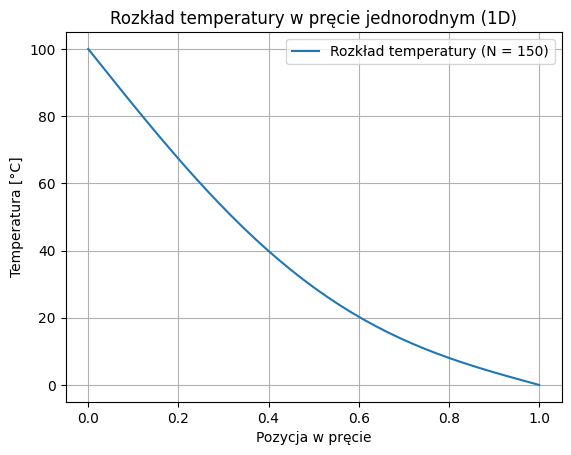

Liczba iteracji: 5000
Czas wykonania: 0.8475 s


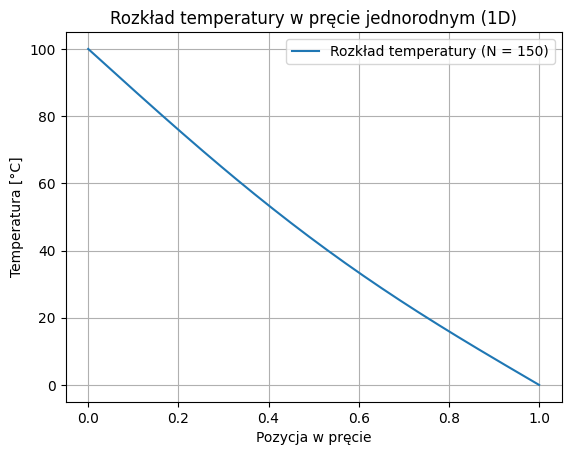

Liczba iteracji: 10000
Czas wykonania: 1.8228 s


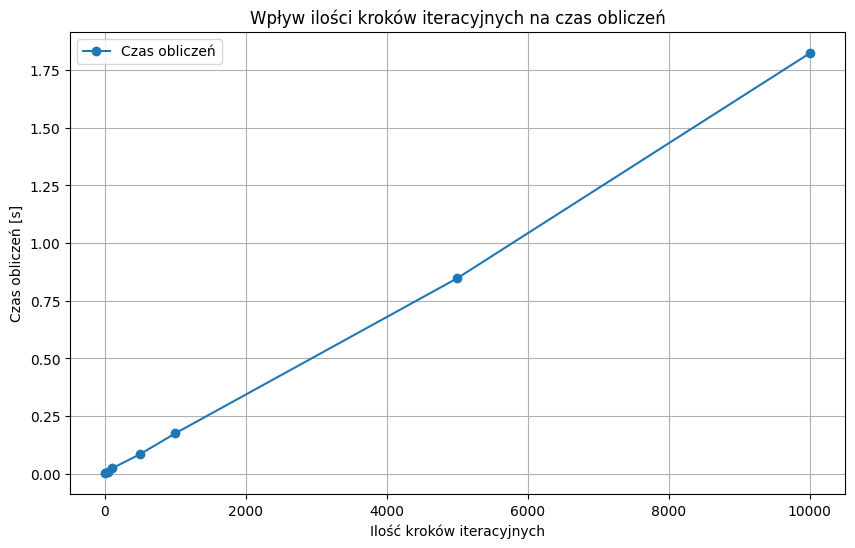


Tabela wyników:
Ilość kroków        Czas obliczeń [s]   
10                  0.002682            
50                  0.009050            
100                 0.023184            
500                 0.084446            
1000                0.174953            
5000                0.847457            
10000               1.822825            


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parametry symulacji
N = 150
T0 = 100
TN = 0
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
tolerance = 0.001

# Lista ilości kroków iteracyjnych do przetestowania
iteration_steps = [10, 50, 100, 500, 1000, 5000, 10000]
times = []

# Przeprowadzenie symulacji
for steps in iteration_steps:
    start_time = time.time()
    _, _, exec_time = simulate_heat_transfer_homogeneous1D(N, T0, TN, k_homogeneous, max_iter=steps, tolerance=tolerance)
    times.append(exec_time)

# Wykres zależności
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, times, '-o', label='Czas obliczeń')
plt.xlabel('Ilość kroków iteracyjnych')
plt.ylabel('Czas obliczeń [s]')
plt.title('Wpływ ilości kroków iteracyjnych na czas obliczeń')
plt.grid(True)
plt.legend()
plt.show()

# Tabela wyników
print("\nTabela wyników:")
print(f"{'Ilość kroków':<20}{'Czas obliczeń [s]':<20}")
print("="*40)

for i in range(len(iteration_steps)):
    print(f"{iteration_steps[i]:<20}{times[i]:<20.6f}")


Wnioski:
Czas obliczeń rośnie liniowo wraz ze wzrostem liczby kroków iteracyjnych, co jest zgodne z oczekiwaniami dla tego typu algorytmu. Wzrost liczby iteracji prowadzi do większej dokładności rozwiązania, jednak znacząco zwiększa czas potrzebny na obliczenia. Początkowo wzrost jest niewielki, ale przy dużej liczbie iteracji (np. 5000 i 10000) czas obliczeń rośnie proporcjonalnie szybciej. Ostatecznie zależność ta ma charakter liniowy, co potwierdza wykres.

Zadanie 4

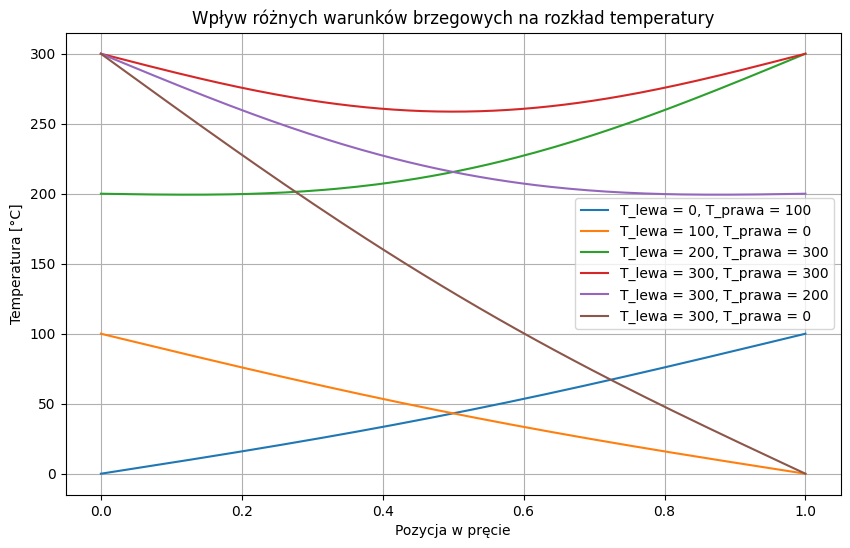


Tabela wyników:
Lewa strona    Prawa strona   Ilość iteracji      
0              100            10000               
100            0              10000               
200            300            10000               
300            300            10000               
300            200            10000               
300            0              10000               


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import time

# ✅ Poprawiona funkcja dla materiału jednorodnego (z poprawionym warunkiem zbieżności i optymalizacją)
def simulate_heat_transfer_homogeneous1D(N, T0, TN, k, max_iter=10000, tolerance=0.01):
    """
    Funkcja symuluje rozkład temperatury w pręcie jednorodnym przy użyciu metody różnic skończonych (MRS).
    
    Parametry:
    - N: liczba węzłów siatki (int)
    - T0: temperatura na lewym końcu pręta (float)
    - TN: temperatura na prawym końcu pręta (float)
    - k: stała wartość współczynnika przewodnictwa cieplnego (float)
    - max_iter: maksymalna liczba iteracji (int)
    - tolerance: tolerancja zbieżności (float)
    
    Zwraca:
    - temperatures: lista z temperaturami w każdym węźle
    - iter_count: liczba wykonanych iteracji
    - exec_time: czas wykonania symulacji (w sekundach)
    """

    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    start_time = time.time()
    history = []  # Do zapisywania zmian temperatury w czasie

    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        # Optymalizacja z użyciem konwolucji
        temperatures[1:-1] = scipy.ndimage.convolve(
            prev_temperatures, [0.5, 1.0, 0.5], mode='constant', cval=0.0
        )[1:-1]

        history.append(temperatures.copy())  # Do wizualizacji procesu stabilizacji

        # Warunek zbieżności (zmiana na średnią zmianę temperatury)
        if np.mean(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    exec_time = time.time() - start_time
    return temperatures, iter_count, exec_time, history

# ✅ Funkcja dla materiału niejednorodnego
def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter=10000, tolerance=0.01):
    """
    Funkcja symuluje rozkład temperatury w pręcie niejednorodnym przy użyciu metody różnic skończonych (MRS).
    """
    temperatures = np.zeros(N)
    temperatures[0] = T0
    temperatures[-1] = TN

    start_time = time.time()
    history = []  # Do zapisywania zmian temperatury w czasie

    for iter_count in range(1, max_iter + 1):
        prev_temperatures = temperatures.copy()

        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2
            k_right = (k_values[i] + k_values[i + 1]) / 2
            temperatures[i] = (k_right * prev_temperatures[i + 1] + k_left * prev_temperatures[i - 1]) / (k_left + k_right)

        history.append(temperatures.copy())  # Do wizualizacji procesu stabilizacji

        if np.mean(np.abs(temperatures - prev_temperatures)) < tolerance:
            break

    exec_time = time.time() - start_time
    return temperatures, iter_count, exec_time, history

# ✅ Realizacja zadania 4 - analiza wpływu warunków brzegowych
N = 150
k_homogeneous = np.full(N, 0.2)  # Materiał jednorodny
max_iter = 10000
tolerance = 0.01

# Warunki brzegowe (lewa strona, prawa strona)
boundary_conditions = [
    (0, 100),
    (100, 0),
    (200, 300),
    (300, 300),
    (300, 200),
    (300, 0)
]

# Przechowywanie wyników
iteration_counts = []

# Wykres rozkładu temperatury
plt.figure(figsize=(10, 6))
for T0, TN in boundary_conditions:
    temperatures, iter_count, _, history = simulate_heat_transfer_homogeneous1D(
        N, T0, TN, k_homogeneous, max_iter=max_iter, tolerance=tolerance
    )
    iteration_counts.append(iter_count)
    plt.plot(np.linspace(0, 1, N), temperatures, label=f'T_lewa = {T0}, T_prawa = {TN}')

# Wykres końcowy
plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.title('Wpływ różnych warunków brzegowych na rozkład temperatury')
plt.legend()
plt.grid(True)
plt.show()

# Wykres zmian temperatury w czasie
plt.figure(figsize=(10, 6))
for step in [0, len(history)//3, 2*len(history)//3, len(history)-1]:
    plt.plot(np.linspace(0, 1, N), history[step], label=f'Iteracja {step}')

plt.legend()
plt.title('Ewolucja temperatury w czasie')
plt.xlabel('Pozycja w pręcie')
plt.ylabel('Temperatura [°C]')
plt.grid(True)
plt.show()

# Tabela wyników
print("\nTabela wyników:")
print(f"{'Lewa strona':<15}{'Prawa strona':<15}{'Ilość iteracji':<20}")
print("="*50)

for i, (T0, TN) in enumerate(boundary_conditions):
    print(f"{T0:<15}{TN:<15}{iteration_counts[i]:<20}")
